# Convolutioneel Neuraal Netwerk

In deze opdracht ga je een model opbouwen om op basis van een aantal MRI-scans te detecteren of een persoon een hersentumor heeft of niet.

Hiervoor maken we gebruik van [deze dataset](https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection) die een 253 scans bevat.

Doorheen deze oefening ga je de volgende stappen uitvoeren:
* Data downloaden en inladen
* Data augmentation
* Data modelling
* Model evaluation

Plaats je code voor deze delen in de stappen hieronder. Vergeet ook zeker niet de bijhorende vragen te beantwoorden.

Evaluatie:
* Code-correctheid: 30%
* Code-netheid/kwaliteit: 20%
* Beantwoorde vragen: 50%

**Opgepast:** Laat de output staan zodat het eenvoudiger is om je bekomen resultaten te interpreteren

In [23]:
# plaats alle benodigde imports hier
import os
import opendatasets as od
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader, Dataset, random_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from PIL import Image

# Controleer of we toegang hebben tot GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Using device: {device}')


Using device: cuda


## Data downloaden en inladen

Download in de code-cellen hieronder de dataset en lees deze in. Zorg ervoor dat je een trainings en validatiedata hebt.
Een testset moet niet apart gehouden worden
Om de dataset in te laden kan je de ImageFolder klasse gebruiken van pytorch.

Zorg er ook voor dat er aan data augmentation gedaan wordt. 
Voorzie dat er minstens drie verschillende augmentations uitgevoerd worden. 

Vragen:
* Hoe is de dataset gestructureerd?
* Hoe vind je de labels?
* Is er een splitsing tussen trainings/validatie/testdata of moet je dit zelf verzorgen?
* Hoeveel beelden kan je overhouden voor validatiedata?
* Met het aantal beelden in deze dataset: op welke manieren kan je er toch voor zorgen dat je een goed getrained model kan bekomen.
  Wat zijn de belangrijkste parameters van de verschillende augmentation lagen? Wat is het effect van deze parameter. **Let op:** Wees hierbij zo volledig mogelijk. Geef dus niet alleen de waarde van de parameters maar ook de beschrijving van het effect van die parameter.

**Antwoord:**

In [11]:
# downloaden dataset
od.download("https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection")
base_dir = "./brain-mri-images-for-brain-tumor-detection"
if os.path.exists(os.path.join(base_dir, "brain_tumor_dataset")):
    os.system("rm -rf "+os.path.join(base_dir, "brain_tumor_dataset"))

Skipping, found downloaded files in "./brain-mri-images-for-brain-tumor-detection" (use force=True to force download)


In [12]:
# Bekijk de mapstructuur
tumor_dir = os.path.join(base_dir, "yes")
no_tumor_dir = os.path.join(base_dir, "no")

print(f"Number of images with tumor: {len(os.listdir(tumor_dir))}")
print(f"Number of images without tumor: {len(os.listdir(no_tumor_dir))}")

# 1. Definieer de transformaties voor data-augmentatie en normalisatie
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomHorizontalFlip(),  # Willekeurige horizontale spiegeling
        transforms.RandomRotation(10),  # Willekeurige rotatie tot 10 graden
        transforms.RandomResizedCrop(224),  # Willekeurige uitsnede en resize naar 224x224
        transforms.ToTensor(),  # Converteer naar tensor
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalisatie
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),  # Resize naar 256x256
        transforms.CenterCrop(224),  # Uitsnede uit het midden naar 224x224
        transforms.ToTensor(),  # Converteer naar tensor
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalisatie
    ]),
}

# 2. Gebruik ImageFolder om de dataset te laden
train_dataset = datasets.ImageFolder(root=base_dir, transform=data_transforms['train'])
val_dataset = datasets.ImageFolder(root=base_dir, transform=data_transforms['val'])

# 3. Splits de dataset in training en validatie sets
train_size = int(0.8 * len(train_dataset))  # 80% voor training
val_size = len(train_dataset) - train_size   # 20% voor validatie
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

# 4. Maak de DataLoaders aan
batch_size = 32  # Batch size voor training en validatie

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

print(f"Train loader batches: {len(train_loader)}")
print(f"Validation loader batches: {len(val_loader)}")


Number of images with tumor: 155
Number of images without tumor: 98
Train loader batches: 7
Validation loader batches: 2


## Data modelling

Stel nu door gebruik te maken van het pytorch framework een convolutioneel neuraal netwerk op met minstens 3 convolutionele lagen.
Zorg dat de structuur van het neuraal netwerk voldoet aan de best practices gezien in de les.
Train het model en toon een geschiedenis van het leerproces waarbij je kijkt naar de accuracy, precision en recall.

Vragen:
* Geef een korte beschrijving van hoe de verschillende types lagen werken. 
* Waarom is het aangeraden om met convolutionele lagen te werken ipv fully-connected lagen?
* Welke types hyperparameter heb je gebruikt in de verschillende lagen. Wees opnieuw ook hier voldoende duidelijk door de betekenis van de hyperparameter op de tensors uit te leggen. (max 5 zinnen per parameter)
* Geef hieronder voor elke laag (niet van het data augmentation gedeelte) weer welke hyperparameters je gekozen hebt en welke input en output dimensies er verwacht worden. Een voorbeeld van de verwachte output zie je hieronder.
* Welke loss functie heb je nodig en waarom?
* Wat is de activatiefunctie in de laatste laag en waarom?

**Antwoord:**

* Laag 1: Convolutionele Laag
    * Input dimensies: 200 x 200 x 3
    * Output dimensies: ....
    * Num kernels:
    * Kernel size:
    * Stride: 
    * Padding: 
    

In [13]:
# create complete model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(32 * 56 * 56, 512)
        self.fc2 = nn.Linear(512, 2)
        self.dropout = nn.Dropout(0.5)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 32 * 56 * 56)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

# Model initialiseren
model = SimpleCNN().to(device)

# Loss en optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [20]:
# train model
def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=25):
    results = {"train_acc": [], "val_acc": []}
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        
        # Training loop
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
        
        # Valideren
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = outputs.max(1)
                val_total += labels.size(0)
                val_correct += predicted.eq(labels).sum().item()

        results['train_acc'].append(correct/total)
        results['val_acc'].append(val_correct/val_total)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {100.*correct/total:.2f}%, Val Loss: {val_loss/len(val_loader):.4f}, Val Accuracy: {100.*val_correct/val_total:.2f}%')
    return results


In [21]:
results = train_model(model, criterion, optimizer, train_loader, val_loader)

Epoch [1/25], Loss: 0.5036, Accuracy: 75.25%, Val Loss: 0.6049, Val Accuracy: 64.71%
Epoch [2/25], Loss: 0.5422, Accuracy: 73.76%, Val Loss: 0.6089, Val Accuracy: 64.71%
Epoch [3/25], Loss: 0.5661, Accuracy: 70.30%, Val Loss: 0.5930, Val Accuracy: 68.63%
Epoch [4/25], Loss: 0.5308, Accuracy: 74.26%, Val Loss: 0.5593, Val Accuracy: 66.67%
Epoch [5/25], Loss: 0.4763, Accuracy: 77.23%, Val Loss: 0.5087, Val Accuracy: 68.63%
Epoch [6/25], Loss: 0.5156, Accuracy: 75.74%, Val Loss: 0.6326, Val Accuracy: 54.90%
Epoch [7/25], Loss: 0.5700, Accuracy: 74.26%, Val Loss: 0.5738, Val Accuracy: 64.71%
Epoch [8/25], Loss: 0.5494, Accuracy: 70.30%, Val Loss: 0.5558, Val Accuracy: 66.67%
Epoch [9/25], Loss: 0.5603, Accuracy: 74.75%, Val Loss: 0.6019, Val Accuracy: 58.82%
Epoch [10/25], Loss: 0.5577, Accuracy: 72.77%, Val Loss: 0.5468, Val Accuracy: 68.63%
Epoch [11/25], Loss: 0.4779, Accuracy: 76.73%, Val Loss: 0.6596, Val Accuracy: 62.75%
Epoch [12/25], Loss: 0.5491, Accuracy: 74.26%, Val Loss: 0.6554

## Model evaluation

Na het trainen van het model kunnen we evalueren of het gebouwde model goed werkt.

Beantwoord hiervoor de volgende vragen:
* Maak een plot van de trainings error en validation accuracy van de getrainde model modellen
* Bespreek op basis van deze figuren of het model aan het over/underfitten is.
* Hoe zou je overfitten tegengaan?
* Hoe zou je underfitten tegengaan?
* Bereken voor de valuatiedata ook de precision, recall en f1-score. Welk van deze metrieken is belangrijk voor deze dataset als we geen false positives willen.

**Antwoorden:...**

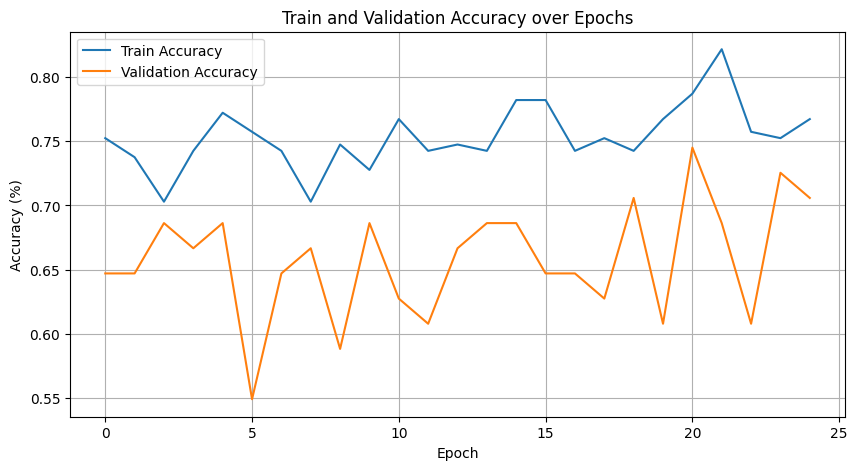

In [22]:
# Evaluation en plots
def plot_accuracy(results):
    plt.figure(figsize=(10, 5))
    plt.plot(results['train_acc'], label='Train Accuracy')
    plt.plot(results['val_acc'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.title('Train and Validation Accuracy over Epochs')
    plt.legend()
    plt.grid()
    plt.show()

plot_accuracy(results)

In [24]:
def calculate_metrics(model, val_loader):
    model.eval()  # Zet model in evaluatiemodus
    all_preds = []
    all_labels = []

    with torch.no_grad():  # Geen gradienten nodig tijdens validatie
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = outputs.max(1)

            # Verzamel alle voorspellingen en labels
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Bereken precision, recall en f1-score
    precision = precision_score(all_labels, all_preds, average='binary')
    recall = recall_score(all_labels, all_preds, average='binary')
    f1 = f1_score(all_labels, all_preds, average='binary')

    print(f'Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')
    return precision, recall, f1

# Aanroep van de functie na het trainen van het model
precision, recall, f1 = calculate_metrics(model, val_loader)

Precision: 0.7333, Recall: 0.8462, F1 Score: 0.7857


## Verbeterde model

Maak nu een tweede model dat probeert betere resultaten te halen dan het bovenstaande model.
Hierbij mag je gebruik maken van alle technieken die je wil.
Er is hierbij maar 1 voorwaarde: **maak gebruik van de torch.nn.BatchNorm2d layer**.
Train en evalueer dit model ook en vergelijk het met het vorige.
Indien je bij het vorige model over/underfitting opgemerkt hebt, pak dit aan in dit model.

Vragen:
* Bespreek de structuur van het model (niet elke hyperparameter meer maar enkel de gekozen lagen). Waarom heb je de wijzigingen doorgevoerd?
* Wat doet de batchnormalization layer? Wat is de beste plaats voor deze laag toe te voegen?
* Bespreek hoe je over/underfitting hebt aangepakt
* Bespreek de behaalde resultaten

**Antwoord:**

In [ ]:
# Model met batchnormalization